In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding = ('ISO-8859-1'), low_memory=False)

In [3]:
df.shape #dimension of the dataframe

(5572, 5)

In [4]:
df.head() #list the rows form the top of the dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info() # summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.dtypes # data type of the each attribute

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

#DATACLEANING

In [7]:
print(df.isnull().sum()) #counting the number of null values in each coulmn

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True) # dropping the column because they have 90% null values

In [9]:
print(df.isnull().sum()) # again checking the null values

v1    0
v2    0
dtype: int64


In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True) # changing the column name V1 to target and V2 to text for better understanding
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder #LabelEncoder converts categorical labels into numerical values
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target']) # converting target column into numerical and fitting it into 0 and 1.

In [14]:
df.head() # 0 - ham and 1 - spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.duplicated().sum() #counting the douplicate values

np.int64(403)

In [16]:
df.drop_duplicates(inplace=True) # dopping the duplicate values column

In [17]:
df.duplicated().sum()  

np.int64(0)

In [18]:
df.shape # checking the dimension after dropping the doublicate values

(5169, 2)

EDA(EXPLORATY DATA ANALYSIS)

In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [20]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [21]:
# !pip install nltk # installing nltk library. nltk - natural language toolkit

In [22]:
# pip install --upgrade nltk

In [23]:
import nltk #nltk provides a vast array of tools for processing and analyzing text.
# nltk.download('punkt_tab') 

In [24]:
df['num_characters'] = df['text'].apply(len) #creating a new coulumn with the number of characters of the text sms for each row

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #creating a new coulumn with the number of words in the text sms

In [27]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [28]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) # creating a column by counting the number of sentences in the text sms
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe() 
 #basic stats on any numeric features
 #count- The number of not-empty values.
 # mean- The average (mean) value.
 # std- The standard deviation.
 # min- the minimum value.
 # 25%- The 25% percentile.
 # 50%- The 50% percentile.
 # 75%- The 75% percentile.
 # max- the maximum value.

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe() # describing the data for ham(not spam) sms

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe() #describing the data for spam sms

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns #to create attractive and informative statistical graphics

In [33]:
import matplotlib.pyplot as plt #to create a variety of plots and charts

<Axes: xlabel='num_characters', ylabel='Count'>

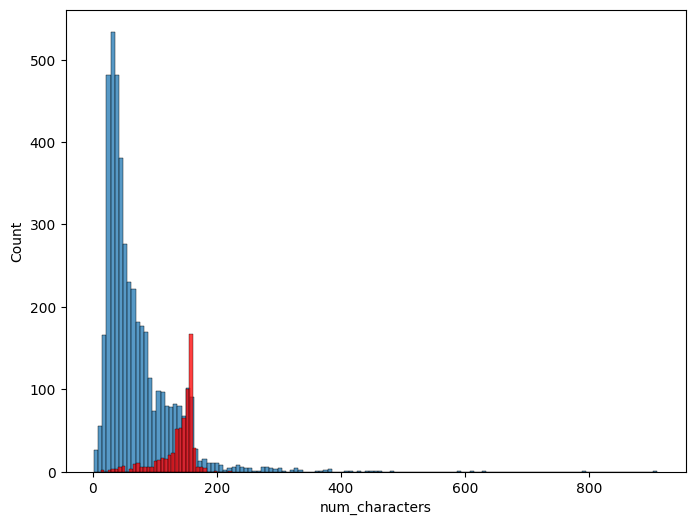

In [34]:
#plotting histogram - A histogram is a graph showing frequency distributions. 
plt.figure(figsize=(8,6)) 
sns.histplot(df[df['target'] == 0]['num_characters']) #histogram of ham messeges for number of characters
sns.histplot(df[df['target'] == 1]['num_characters'],color='red') #histogram of spam messeges for number of characters in red color

<Axes: xlabel='num_words', ylabel='Count'>

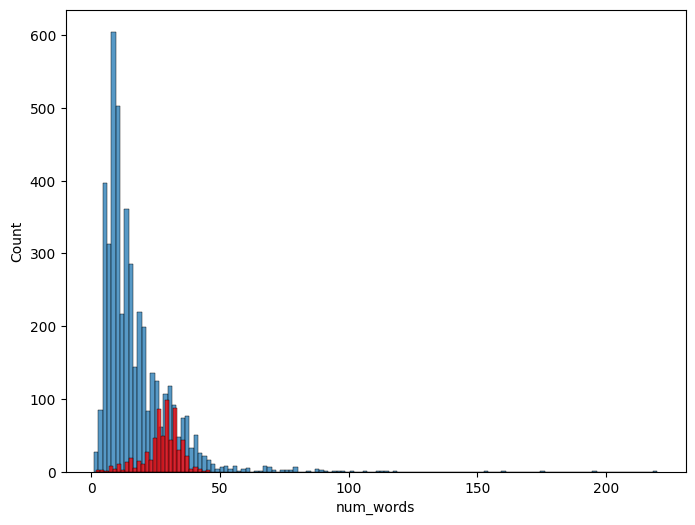

In [35]:
plt.figure(figsize=(8,6)) 
sns.histplot(df[df['target'] == 0]['num_words']) #histogram of ham messeges for number of words
sns.histplot(df[df['target'] == 1]['num_words'],color='red') #histogram of spam messeges for number of words in red color

<Axes: xlabel='num_sentences', ylabel='Count'>

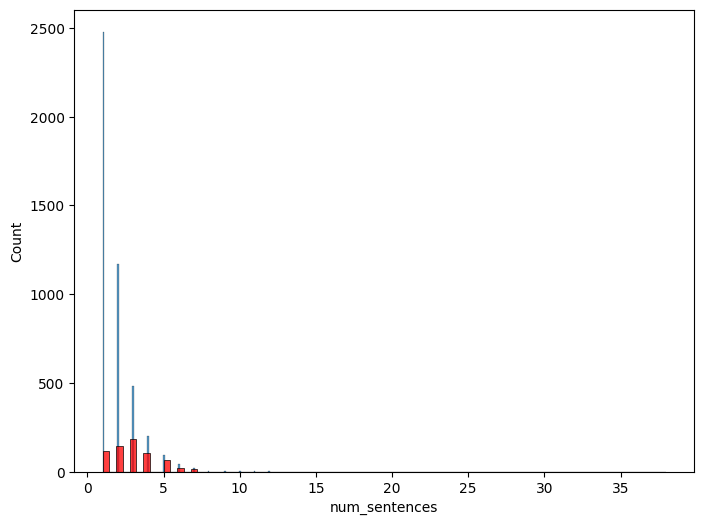

In [36]:
plt.figure(figsize=(8,6)) 
sns.histplot(df[df['target'] == 0]['num_sentences']) #histogram of ham messeges for number of sentences
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red') #histogram of spam messeges for number of sentences  in red color

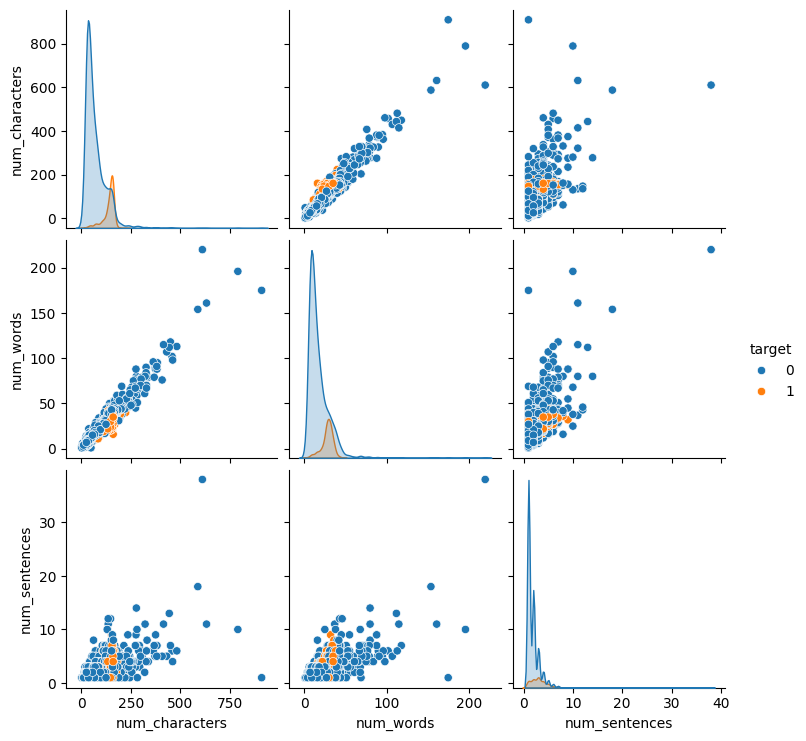

In [37]:
sns.pairplot(df,hue='target') #shows the pairwise relationships between all numerical variables in the DataFrame.

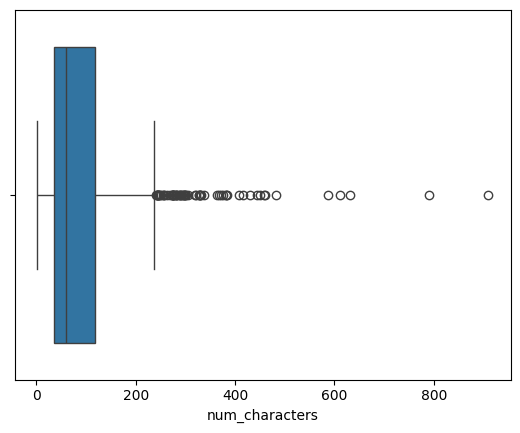

In [38]:
sns.boxplot(x=df['num_characters']) # plotting the oultlier
plt.show()

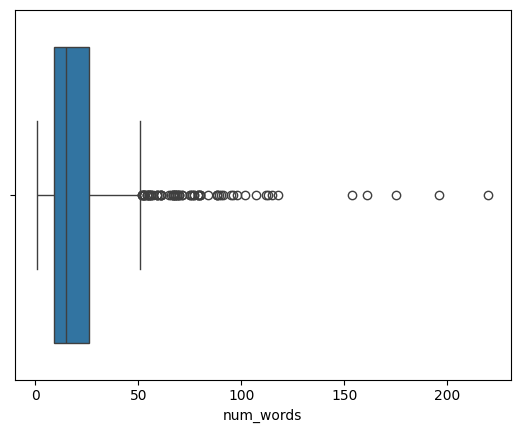

In [39]:
sns.boxplot(x=df['num_words'])
plt.show()

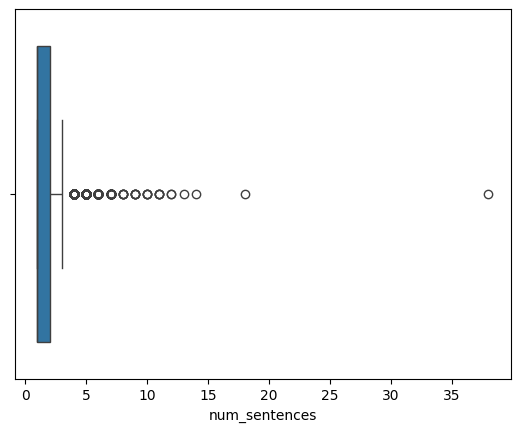

In [40]:
sns.boxplot(x=df['num_sentences'])
plt.show()

In [41]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [42]:
df_numeric = df.select_dtypes(include=[np.number]) #selecting column only with nummerical data type

Text(0.5, 1.0, 'Correlation Heatmap')

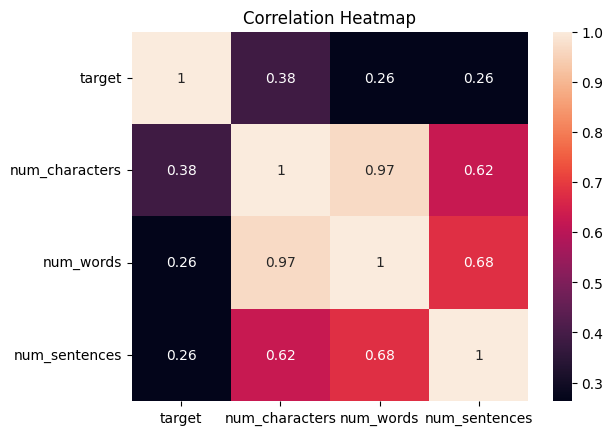

In [43]:
sns.heatmap(df_numeric.corr(), annot=True) #compute the pairwise correlation of columns in a DataFrame containing numeric data
plt.title('Correlation Heatmap') 

In [44]:
df.shape

(5169, 5)

In [45]:
df_numeric.shape

(5169, 4)

DATA/TEXT PREPROCESSING

In [46]:
from nltk.corpus import stopwords
# nltk.download('stopwords')

In [47]:
import string

In [48]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [49]:
# creating a function for converting text into Lower case, Tokenization,Removing special characters,Removing stop words and punctuation,Stemming
def transform_text(text):
    text = text.lower() # convert all the sms into lowercase
    text = nltk.word_tokenize(text) # breaking down of text into smaller units called tokens.
    
    y = [] #taking an empty list
    for i in text: #applying for loop on the text to remove special chacters
        if i.isalnum():
            y.append(i) #it will append all the tokenized text which are only alphanumeric
    
    text = y[:] #copy the  y to the variable text
    y.clear() # after copying all the data of y into text variable clearing the y
    
    for i in text: # again applying another for loop for removing stop words(a,an,is,or,if) and punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:] #copy the  y to the variable text
    y.clear() # after copying all the data of y into text variable clearing the y
    
    for i in text: #again using another for loop on text for removing stemming(reduce words to their root or base form)
        y.append(ps.stem(i)) # reduce words to their root or base form and append them in y
    
            
    return " ".join(y) # returnig y as a string

In [50]:
df['transformed_text'] = df['text'].apply(transform_text) # applies function transform_text on the column text and assign the transformed data into new column called tranformed_text
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
# pip install wordcloud #installing the wordcloud libarary on the system

In [52]:
from wordcloud import WordCloud #Word clouds are commonly used to highlight the most prominent terms in a dataset, used for text analysis and data visualization

In [53]:
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white') #defining the properties of the wordcloud

In [54]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
# first filters the DataFrame df to include only the rows where the target column is equal to 1(spam).
#The str.cat method concatenates all the text entries in the transformed_text column into a single string. The sep=" " parameter specifies that a space should be used to separate each text entry in the concatenated string.
# wc.generate takes the concatenated string of text as input and generates the word cloud.

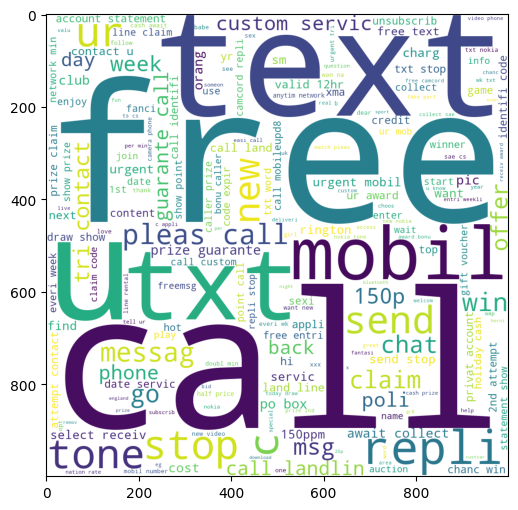

In [55]:
plt.figure(figsize=(15,6)) #sets the size of the figure to 15 inches in width and 6 inches in height.
plt.imshow(spam_wc) #imshow is a function from Matplotlib that is used to display image data.

In [56]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")) 
# first filters the DataFrame df to include only the rows where the target column is equal to 0(ham).
#The str.cat method concatenates all the text entries in the transformed_text column into a single string. The sep=" " parameter specifies that a space should be used to separate each text entry in the concatenated string.
# wc.generate takes the concatenated string of text as input and generates the word cloud.

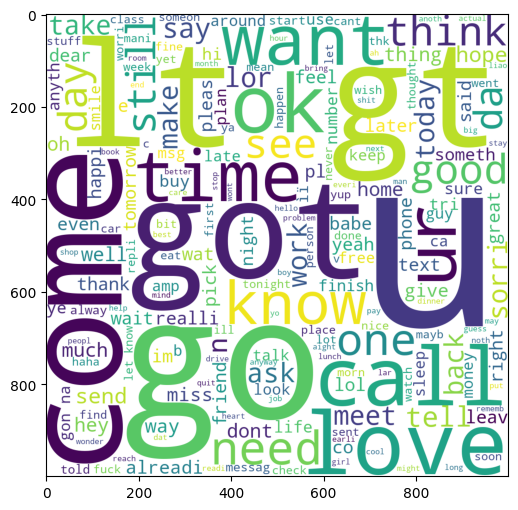

In [57]:
plt.figure(figsize=(15,6)) #sets the size of the figure to 15 inches in width and 6 inches in height.
plt.imshow(ham_wc) #imshow is a function from Matplotlib that is used to display image data.

In [58]:
spam_corpus = [] #creates an empty list named spam_corpus that will be used to store words from the spam messages.
for msg in df[df['target'] == 1]['transformed_text'].tolist(): #filters the DataFrame to include only the rows which are spam and converted into the list of strings.
    for word in msg.split(): #using split() method each messege is splited into individual words
        spam_corpus.append(word) #Each word obtained from splitting the message is appended to the spam_corpus list.

In [59]:
len(spam_corpus) #print the total number of words contained in the spam_corpus

9939

In [60]:
from collections import Counter #A Counter is a subclass of dict that's designed for counting hashable objects

In [61]:
pd.DataFrame(Counter(spam_corpus).most_common(30)) #counting the most common 30 words and their count in spam sms

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


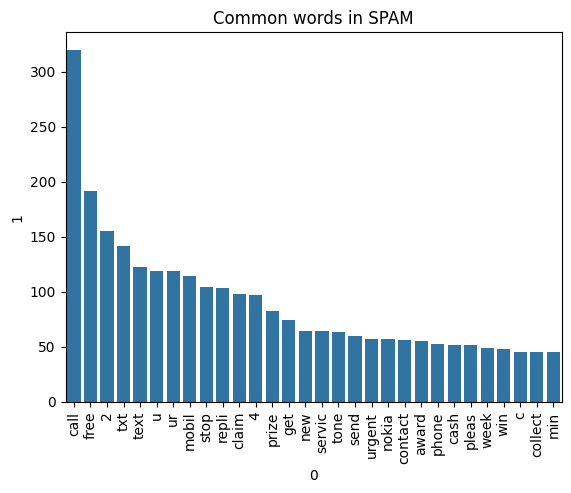

In [62]:
#bar plot visualizes the most common words in your spam corpus. At the x axis the word count and at Y axis the words are represented
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1]) 
plt.xticks(rotation='vertical') # Rotate the x-ticks vertically
plt.title('Common words in SPAM')
plt.show() 

In [63]:
ham_corpus = []  #creates an empty list named spam_corpus that will be used to store words from the ham messages.
for msg in df[df['target'] == 0]['transformed_text'].tolist(): #filters the DataFrame to include only the rows which are ham and converted into the list of strings.
    for word in msg.split():  #using split() method each messege is splited into individual words
        ham_corpus.append(word)  #Each word obtained from splitting the message is appended to the ham_corpus list.

In [64]:
len(ham_corpus) #print the total number of words contained in the ham_corpus

35404

In [65]:
from collections import Counter #A Counter is a subclass of dict that's designed for counting hashable objects

In [66]:
pd.DataFrame(Counter(ham_corpus).most_common(30)) #counting the most common 30 words and their count in ham sms

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


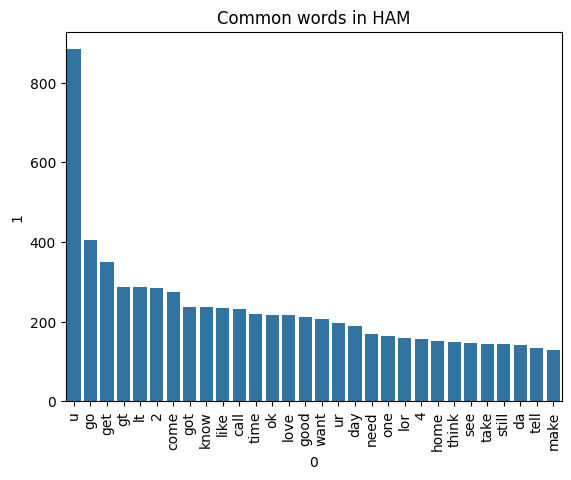

In [67]:
#bar plot visualizes the most common words in your ham corpus. At the x axis the word count and at Y axis the words are represented
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title('Common words in HAM')
plt.show()

MODEL BUILDING

In [99]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [100]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [101]:
X.shape

(5169, 6708)

In [102]:
y = df['target'].values

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [119]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [120]:
clfs = {
    'KNN' : knc, 
    'NB': mnb, 
    'DT': dtc,
}

Hold-Out Method

For KNN with test size 0.2
Accuracy -  0.8965183752417795
Precision -  0.9076353770983353
Recall -  0.8965183752417795
F1 Score -  0.8692025621484506


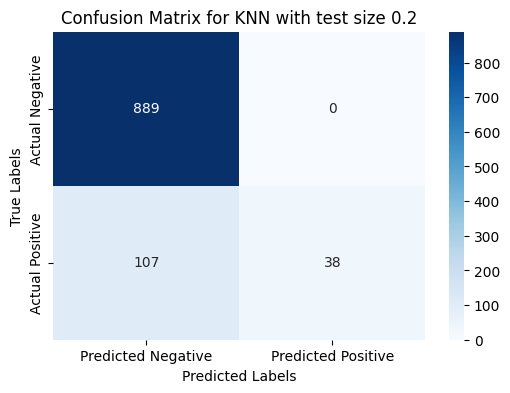

For NB with test size 0.2
Accuracy -  0.9613152804642167
Precision -  0.9625179548498087
Recall -  0.9613152804642167
F1 Score -  0.958803316428211


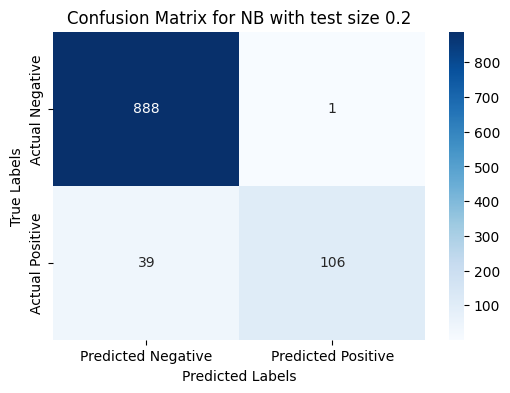

For DT with test size 0.2
Accuracy -  0.9352030947775629
Precision -  0.9324180109526712
Recall -  0.9352030947775629
F1 Score -  0.9330520396015182


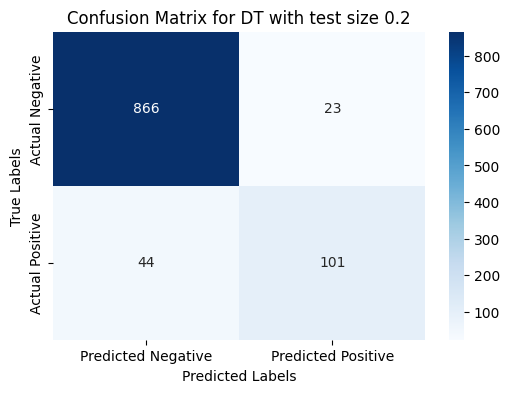

For KNN with test size 0.25
Accuracy -  0.888631090487239
Precision -  0.9014505333088518
Recall -  0.888631090487239
F1 Score -  0.8568625385571224


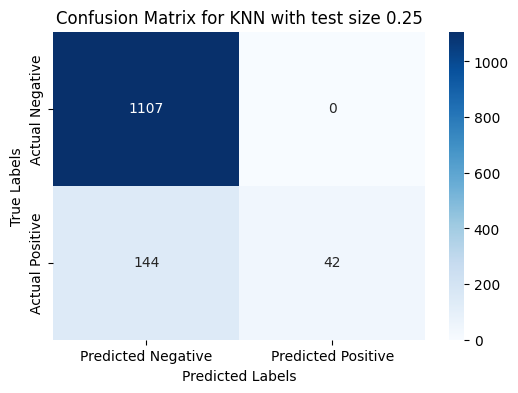

For NB with test size 0.25
Accuracy -  0.9520494972931168
Precision -  0.954592637727528
Recall -  0.9520494972931168
F1 Score -  0.9479075514090336


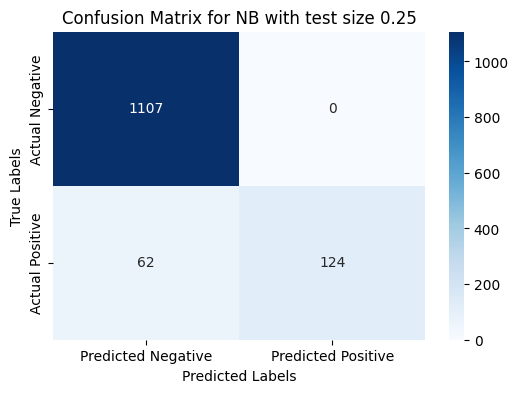

For DT with test size 0.25
Accuracy -  0.9288476411446249
Precision -  0.9264622693625014
Recall -  0.9288476411446249
F1 Score -  0.9273255875414447


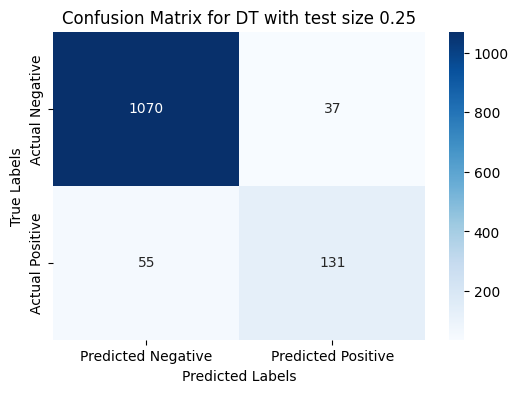

For KNN with test size 0.33
Accuracy -  0.8921453692848769
Precision -  0.9041292171421127
Recall -  0.8921453692848769
F1 Score -  0.8603787402714335


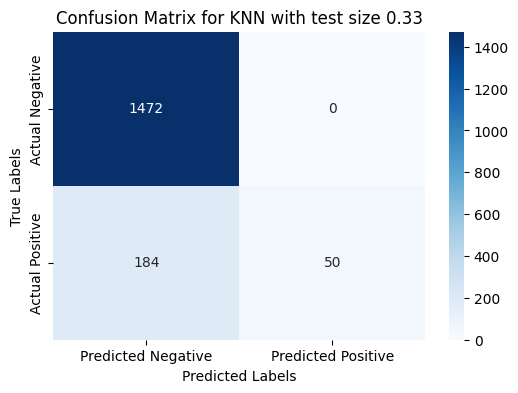

For NB with test size 0.33
Accuracy -  0.9513481828839391
Precision -  0.9539450322862754
Recall -  0.9513481828839391
F1 Score -  0.9467709097842122


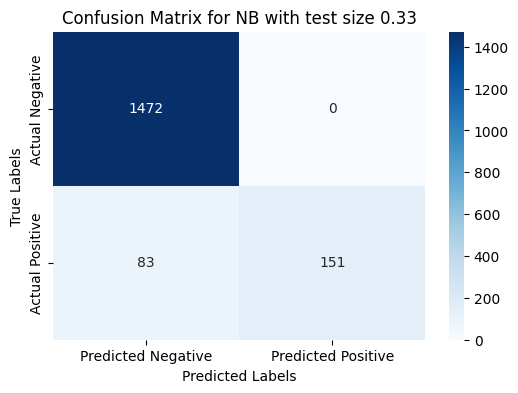

For DT with test size 0.33
Accuracy -  0.9308323563892146
Precision -  0.9276528742396573
Recall -  0.9308323563892146
F1 Score -  0.9285178702412731


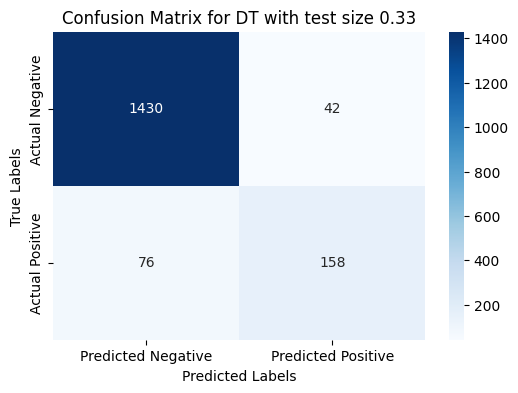

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Define the 'train_classifier' function correctly
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    current_accuracy = accuracy_score(y_test, y_pred)
    current_precision = precision_score(y_test, y_pred, average='weighted')
    current_recall = recall_score(y_test, y_pred, average='weighted')
    current_f1 = f1_score(y_test, y_pred, average='weighted')
    return current_accuracy, current_precision, current_recall, current_f1, y_pred

# Assuming 'clfs' is a dictionary of classifiers
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Different test sizes
test_sizes = [0.20, 0.25, 0.33]

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    for name, clf in clfs.items():
        current_accuracy, current_precision, current_recall, current_f1, y_pred = train_classifier(clf, X_train, y_train, X_test, y_test)
        
        print(f"For {name} with test size {test_size}")
        print("Accuracy - ", current_accuracy)
        print("Precision - ", current_precision)
        print("Recall - ", current_recall)
        print("F1 Score - ", current_f1)
        
        accuracy_scores.append(current_accuracy)
        precision_scores.append(current_precision)
        recall_scores.append(current_recall)
        f1_scores.append(current_f1)
        
        # Calculate the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        
        # Create a heatmap for the confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
        
        # Add labels and title
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title(f'Confusion Matrix for {name} with test size {test_size}')
        plt.show()

RANDOM SUBSAMPLING.

For KNN with test size 0.2
Accuracy -  0.879110251450677
Precision -  0.8939106614101926
Recall -  0.879110251450677
F1 Score -  0.8330144754343037


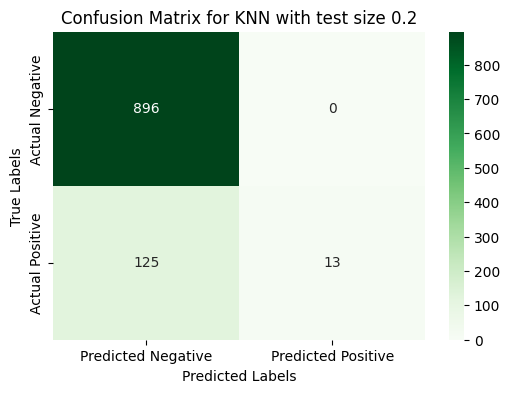

For NB with test size 0.2
Accuracy -  0.9303675048355899
Precision -  0.935546781335422
Recall -  0.9303675048355899
F1 Score -  0.919424251051231


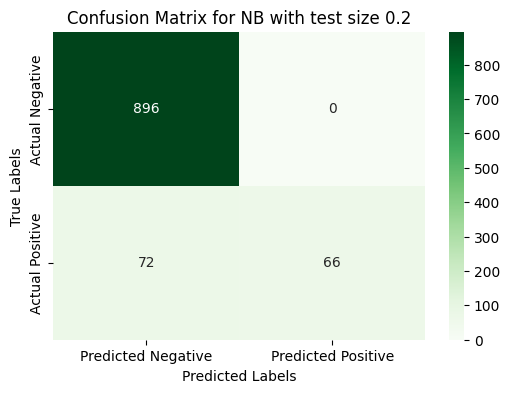

For DT with test size 0.2
Accuracy -  0.9294003868471954
Precision -  0.9251421230671397
Recall -  0.9294003868471954
F1 Score -  0.9252448838264441


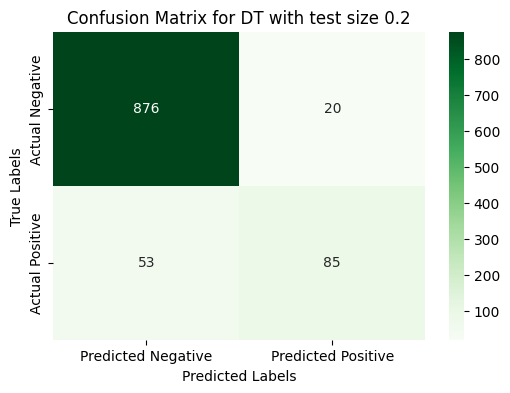

For KNN with test size 0.25
Accuracy -  0.8847641144624904
Precision -  0.898188779783123
Recall -  0.8847641144624904
F1 Score -  0.8398246243894374


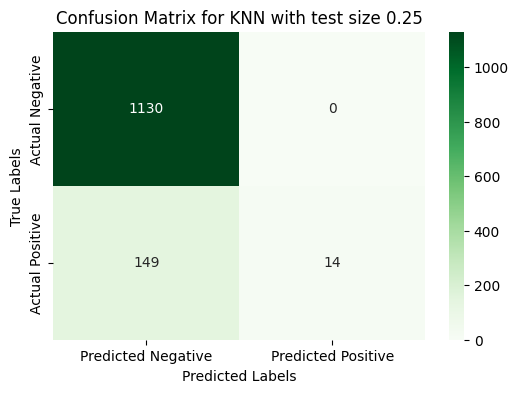

For NB with test size 0.25
Accuracy -  0.922660479505027
Precision -  0.9289482453989274
Recall -  0.922660479505027
F1 Score -  0.9071885152842125


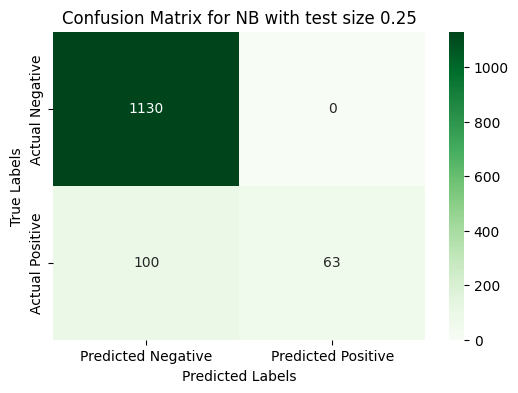

For DT with test size 0.25
Accuracy -  0.934261407579273
Precision -  0.9302560874378333
Recall -  0.934261407579273
F1 Score -  0.9298808453247361


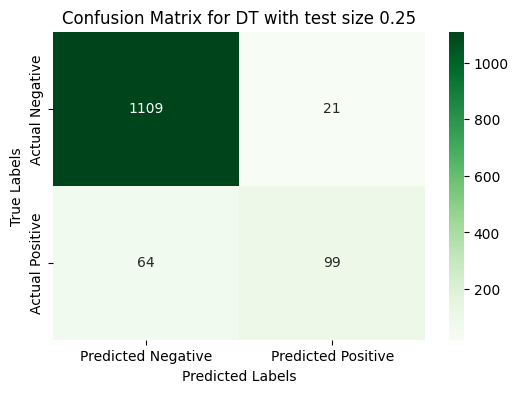

For KNN with test size 0.33
Accuracy -  0.8851113716295428
Precision -  0.8984515204213731
Recall -  0.8851113716295428
F1 Score -  0.8401214232849069


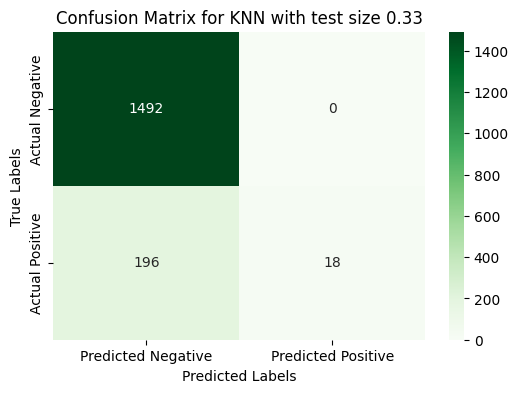

For NB with test size 0.33
Accuracy -  0.9173505275498242
Precision -  0.9244868261508496
Recall -  0.9173505275498242
F1 Score -  0.8989127031056611


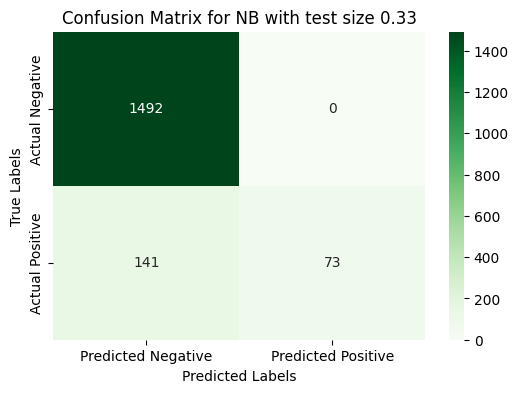

For DT with test size 0.33
Accuracy -  0.9308323563892146
Precision -  0.9282046735354743
Recall -  0.9308323563892146
F1 Score -  0.9292114646691502


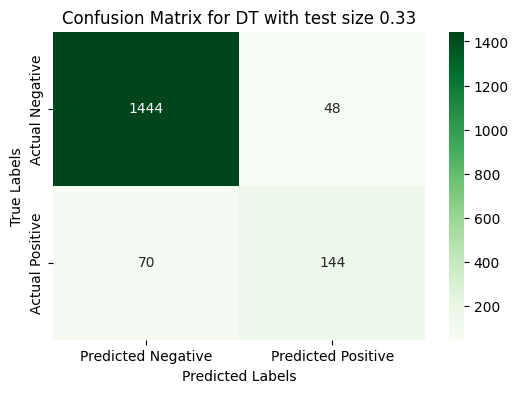

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Define the 'train_classifier' function correctly
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    current_accuracy = accuracy_score(y_test, y_pred)
    current_precision = precision_score(y_test, y_pred, average='weighted')
    current_recall = recall_score(y_test, y_pred, average='weighted')
    current_f1 = f1_score(y_test, y_pred, average='weighted')
    return current_accuracy, current_precision, current_recall, current_f1, y_pred

# Assuming 'clfs' is a dictionary of classifiers
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Different test sizes
test_sizes = [0.20, 0.25, 0.33]

for test_size in test_sizes:
    # Random Sub-Sampling
    X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=test_size, random_state=2)
    X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, train_size=0.5, random_state=2)
    
    for name, clf in clfs.items():
        current_accuracy, current_precision, current_recall, current_f1, y_pred = train_classifier(clf, X_train, y_train, X_test, y_test)
        
        print(f"For {name} with test size {test_size}")
        print("Accuracy - ", current_accuracy)
        print("Precision - ", current_precision)
        print("Recall - ", current_recall)
        print("F1 Score - ", current_f1)
        
        accuracy_scores.append(current_accuracy)
        precision_scores.append(current_precision)
        recall_scores.append(current_recall)
        f1_scores.append(current_f1)
        
        # Calculate the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        
        # Create a heatmap for the confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
        
        # Add labels and title
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title(f'Confusion Matrix for {name} with test size {test_size}')
        plt.show()


CROSS-VALIDATION

For KNN with test size 0.2
Accuracy -  0.8766328011611031
Precision -  0.8919934631259071
Recall -  0.8766328011611031
F1 Score -  0.8270442325745025


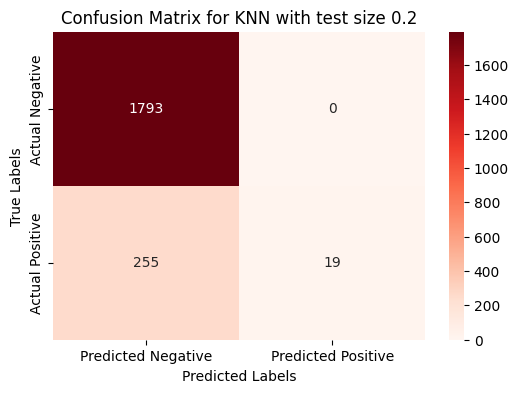

For NB with test size 0.2
Accuracy -  0.9119496855345912
Precision -  0.9200636891967201
Recall -  0.9119496855345912
F1 Score -  0.892183874757592


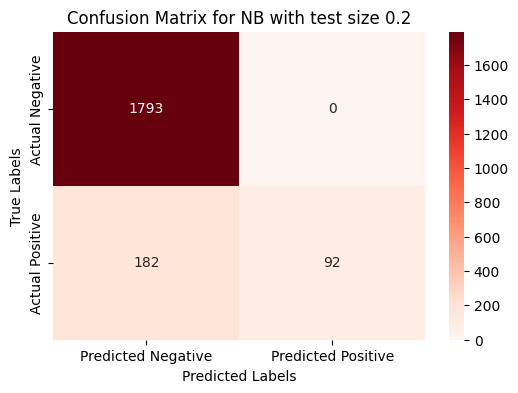

For DT with test size 0.2
Accuracy -  0.9371069182389937
Precision -  0.9341193515456818
Recall -  0.9371069182389937
F1 Score -  0.9326961238162754


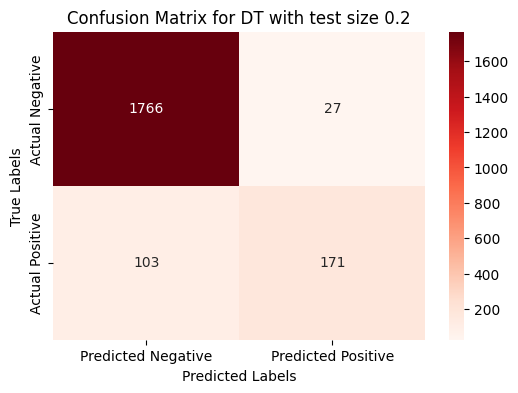

For KNN with test size 0.25
Accuracy -  0.8833849329205367
Precision -  0.8970687362226958
Recall -  0.8833849329205367
F1 Score -  0.8343090931963112


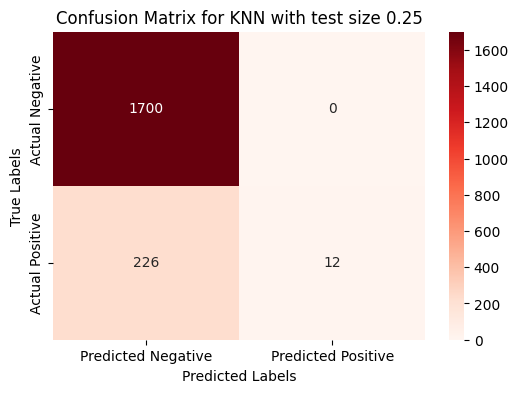

For NB with test size 0.25
Accuracy -  0.9097007223942208
Precision -  0.9181286549707602
Recall -  0.9097007223942208
F1 Score -  0.8856610545717034


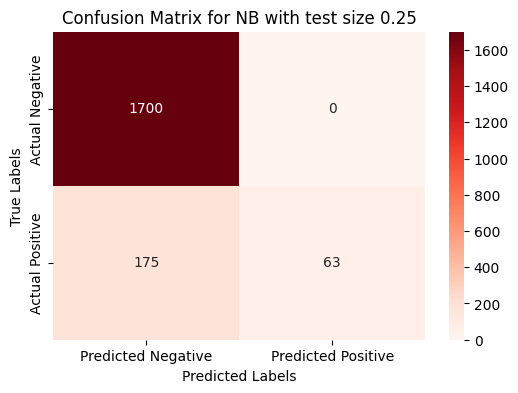

For DT with test size 0.25
Accuracy -  0.9344685242518059
Precision -  0.9302759451095123
Recall -  0.9344685242518059
F1 Score -  0.930066445596364


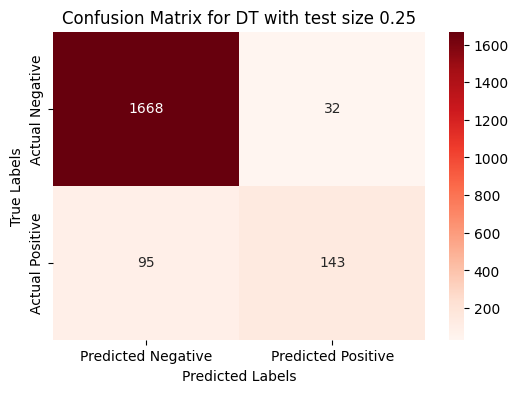

For KNN with test size 0.33
Accuracy -  0.8827267475447718
Precision -  0.8965516431594126
Recall -  0.8827267475447718
F1 Score -  0.8325386595780933


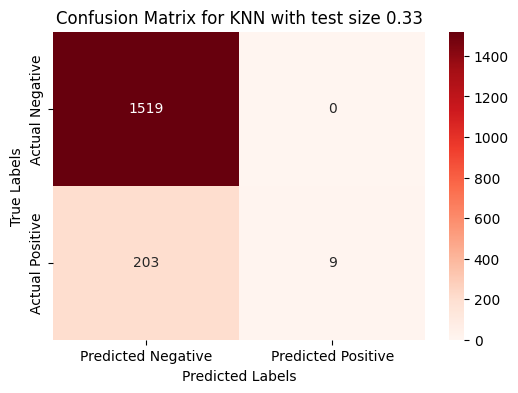

For NB with test size 0.33
Accuracy -  0.9093009820912767
Precision -  0.9177972504753277
Recall -  0.9093009820912767
F1 Score -  0.884863233656768


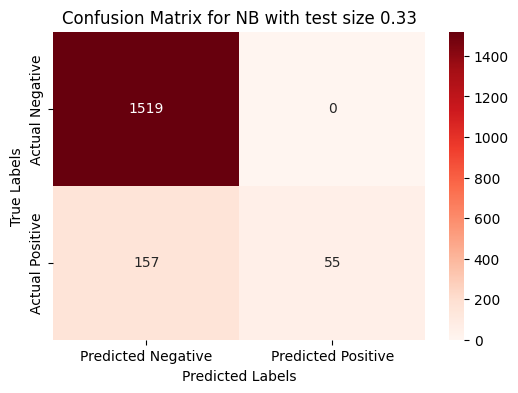

For DT with test size 0.33
Accuracy -  0.9347198151357596
Precision -  0.9308156682121844
Recall -  0.9347198151357596
F1 Score -  0.9314915668752168


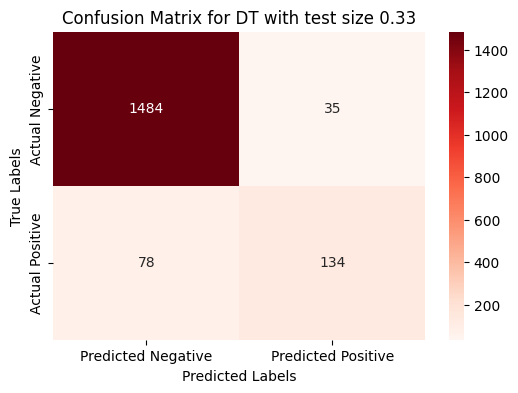

Average Accuracy for KNN: 0.9088879032525621
Average Precision for KNN: 0.9152016002242447
Average Recall for KNN: 0.9088879032525621
Average F1 Score for KNN: 0.8834282538469806
Average Accuracy for NB: 0.9088879032525621
Average Precision for NB: 0.9152016002242447
Average Recall for NB: 0.9088879032525621
Average F1 Score for NB: 0.8834282538469806
Average Accuracy for DT: 0.9088879032525621
Average Precision for DT: 0.9152016002242447
Average Recall for DT: 0.9088879032525621
Average F1 Score for DT: 0.8834282538469806


In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict, KFold
import numpy as np

# Define the 'evaluate_classifier' function correctly
def evaluate_classifier(clf, X, y, cv):
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    current_accuracy = accuracy_score(y, y_pred)
    current_precision = precision_score(y, y_pred, average='weighted')
    current_recall = recall_score(y, y_pred, average='weighted')
    current_f1 = f1_score(y, y_pred, average='weighted')
    return current_accuracy, current_precision, current_recall, current_f1, y_pred

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Different test sizes
test_sizes = [0.20, 0.25, 0.33]

# Define the cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=2)

for test_size in test_sizes:
    # Random Sub-Sampling
    X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=test_size, random_state=2)
    X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, train_size=0.5, random_state=2)
    
    for name, clf in clfs.items():
        current_accuracy, current_precision, current_recall, current_f1, y_pred = evaluate_classifier(clf, X_train, y_train, cv)
        
        print(f"For {name} with test size {test_size}")
        print("Accuracy - ", current_accuracy)
        print("Precision - ", current_precision)
        print("Recall - ", current_recall)
        print("F1 Score - ", current_f1)
        
        accuracy_scores.append(current_accuracy)
        precision_scores.append(current_precision)
        recall_scores.append(current_recall)
        f1_scores.append(current_f1)
        
        # Calculate the confusion matrix
        cm = confusion_matrix(y_train, y_pred)
        
        # Create a heatmap for the confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
        
        # Add labels and title
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title(f'Confusion Matrix for {name} with test size {test_size}')
        plt.show()

# After all iterations, print the average accuracy, precision, recall, and F1 scores for each classifier
for name in clfs.keys():
    print(f"Average Accuracy for {name}: {np.mean(accuracy_scores)}")
    print(f"Average Precision for {name}: {np.mean(precision_scores)}")
    print(f"Average Recall for {name}: {np.mean(recall_scores)}")
    print(f"Average F1 Score for {name}: {np.mean(f1_scores)}")
